# *RAPPORT*: 

##  1. Analyse exploratoire.

Notre mission est de créer un plan de raccordement qui priorise les batiments les plus simples à raccorder (en minimisant les coûts) tout en maximisant le nombre de prises raccordées. Toutefois, il est important de bien comprendre nos données, c'est la raison pour laquelle une attention particulière est accordée à l'analyse exploratoire. 


In [1]:
# importons nos packages

import pandas as pd

import numpy as np 

import matplotlib.pyplot as plt

In [2]:
# on charge notre dataframe: 

df = pd.read_csv("./reseau_en_arbre.csv")

# on affiche les cinq premières lignes de ce dataframe

df.head(10)

,id_batiment,nb_maisons,infra_id,infra_type,longueur
0,E000001,4,P007111,infra_intacte,12.314461
1,E000001,4,P007983,infra_intacte,40.320929
2,E000001,4,P000308,infra_intacte,39.140799
3,E000001,4,P007819,infra_intacte,17.390464
4,E000002,1,P007111,infra_intacte,12.314461


On constate que notre jeu de donnée a été  bien importé.  

In [4]:
a, b = df.shape
print(f'Notre jeu de donnée a {a} lignes et {b} colonnes.')

Notre jeu de donnée a 6107 lignes et 5 colonnes.


In [5]:
# Renseignons nous sur ce dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6107 entries, 0 to 6106
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id_batiment  6107 non-null   object 
 1   nb_maisons   6107 non-null   int64  
 2   infra_id     6107 non-null   object 
 3   infra_type   6107 non-null   object 
 4   longueur     6107 non-null   float64
dtypes: float64(1), int64(1), object(3)
memory usage: 238.7+ KB


`id_batiment`, `infra_id`,`infra_id` sont de type object. Connaitre la nature de ces variables nous sera utilse plus tard lors de l'implémentation de notre solution de raccordement. 

il est bon à remarqué que notre dataframe n'a pas de valeurs manquantes. 

In [9]:
df.duplicated().value_counts()

False    5586
True      521
Name: count, dtype: int64

In [10]:
# on peut regarder si des données sont manquantes.

df.isnull().sum()


id_batiment    0
nb_maisons     0
infra_id       0
infra_type     0
longueur       0
dtype: int64

In [13]:
# Quelques statistiques descriptives 

df.describe()

,nb_maisons,longueur
count,6107.000000,6107.000000
mean,1.016211,29.314081
std,0.203714,21.681575
min,1.000000,0.372684
25%,1.000000,8.476727
50%,1.000000,27.771443
75%,1.000000,49.956115
max,4.000000,76.985593


<Axes: xlabel='infra_type'>

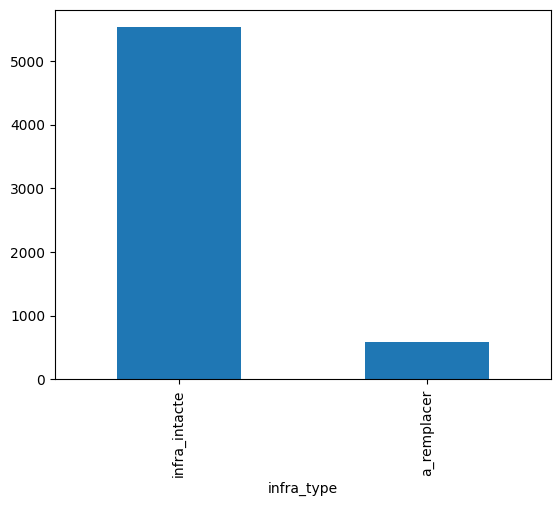

In [16]:
# regarder par type d'infrastructure 

df['infra_type'].value_counts().plot(kind = "bar")


Il y a plus d'infrastructure intacte que d'infrastructure à remplacer. 

## 2. CHOIX DES METRIQUES
MODELISATION
PROPOSITION DE SOLUTION
SHAPEFILES
DISCUSSION

Pour pouvoir effectuer une planification, il nous a fallu choisir une métrique. Cela n'a pas été chose aisée mais la métrique que nous avons décidé d'utiliser est la *difficulté de raccordement d'une batiment*. Cependant, l'obtention de cette métrique passe d'abord par calculer:
- La difficulté de raccordement d'une infrastructure dans un premier temps,
- La difficulté de raccordement d'un batiment dans un second temps qui est la somme des raccordement des infrastructures appliqué aux batiments. 

Les formules sont:

- Difficulté(infra) = longueur / nombre de maison qu’elle permet de raccorder
- Difficulté(batîment) = somme(difficultés des infras qui permettent de le raccorder)







## 3. Modélisation

Pour répondre au problème qui nous a été posé, nous avons proposé deux approches: Une approche procédurale et une approche par la programmation orientée objet. 

L 'approche par la programmation orientée objet a été développé dans le dossier prévu à cet effet.
Dans ce rapport et pour un soucis de clarté, nous avons décidé de présenter l'approche procédurale.

#### a. difficulté de raccordement d'infrastructure

In [24]:
# on regroupe par rapport à infra_id
infras = df.groupby('infra_id')

# calcul de la difficulté de raccordement d'infrastructure

df['nb_maison_total'] = infras['nb_maisons'].transform('sum')

df['diff_infra'] = df['longueur'] / df['nb_maison_total']

# on ne garde que  les données dont type d'infrastructure est à reparer

df.loc[df['infra_type'] == 'infra_intacte', 'diff_infra'] = 0

df.head(10)

,id_batiment,nb_maisons,infra_id,infra_type,longueur,nb_maison_total,diff_infra
0,E000001,4,P007111,infra_intacte,12.314461,422,0.0
1,E000001,4,P007983,infra_intacte,40.320929,46,0.0
2,E000001,4,P000308,infra_intacte,39.140799,39,0.0
3,E000001,4,P007819,infra_intacte,17.390464,4,0.0
4,E000002,1,P007111,infra_intacte,12.314461,422,0.0
5,E000002,1,P007983,infra_intacte,40.320929,46,0.0
6,E000002,1,P000308,infra_intacte,39.140799,39,0.0
7,E000002,1,P007240,infra_intacte,10.914626,1,0.0
8,E000003,1,P007111,infra_intacte,12.314461,422,0.0
9,E000003,1,P007111,infra_intacte,12.314461,422,0.0


### b. Difficulté de raccordement de batiment

On rappelle que cette métrique est la somme des difficultés des infrastructures qui permettent de raccorder un batiment. 



In [25]:
"""Algorithme"""

# on regroupe par rapport à l'id_batiment:

bats = df.groupby(by='id_batiment')

df["diff_bat"]=bats["diff_infra"].transform('sum')

df.head(5)





,id_batiment,nb_maisons,infra_id,infra_type,longueur,nb_maison_total,diff_infra,diff_bat
0,E000001,4,P007111,infra_intacte,12.314461,422,0.0,0.0
1,E000001,4,P007983,infra_intacte,40.320929,46,0.0,0.0
2,E000001,4,P000308,infra_intacte,39.140799,39,0.0,0.0
3,E000001,4,P007819,infra_intacte,17.390464,4,0.0,0.0
4,E000002,1,P007111,infra_intacte,12.314461,422,0.0,0.0


In [ ]:
# On supprime les doublons 

df_bat_diff=df_bat_diff.drop_duplicates()



df_bat_diff=df_bat_diff.sort_values(by='diff_bat')

df_bat_diff=df_bat_diff[df_bat_diff['diff_bat']>0]

print(df_bat_diff)

In [ ]:
### 4. Proposition de solutions
